# Visualize data configurations

In [1]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.stats import chisquare

In [2]:
basepath = "./data/"
#basepath_data = os.path.join(basepath, 'data.npy')
basepath_data_BCN = os.path.join(basepath, 'data_BCN.npy')
basepath_data_NAP = os.path.join(basepath, 'data_NAP.npy')
basepath_target = os.path.join(basepath, 'target.npy')
basepath_ID = os.path.join(basepath, 'ID_info.csv')

In [3]:
# Load the data
#data = np.load(basepath_data)

# Since the data.npy array is too heavy to be uploaded to github,
# we will just combine the data arrays from Bcn and Naples

In [4]:
# Load the targets
target = np.load(basepath_target)
print(target.shape)

(270,)


In [5]:
# Data from Barelona
data_BCN = np.load(basepath_data_BCN)
print(data_BCN.shape)

(165, 76, 76, 3)


In [6]:
# Data from Naples
data_NAP = np.load(basepath_data_NAP)
print(data_NAP.shape)

(105, 76, 76, 3)


In [7]:
# Combine the arrays along the first axis (axis=0)
data = np.concatenate((data_BCN, data_NAP), axis=0)

# Check the shape of the combined array
print(data.shape)

(270, 76, 76, 3)


In [8]:
def quantiles_calculate(data, list):
    print("QUANTILES")
    for q in np.linspace(0, 1, 11):
        quantile_value = np.quantile(data[:, :, :, :], q)
        list.append(quantile_value)
        print("{:.2f} -> {:.4f}".format(q, quantile_value))

In [9]:
quantiles_BCN = []
quantiles_calculate(data_BCN, quantiles_BCN)

QUANTILES
0.00 -> -0.9064
0.10 -> 0.0000
0.20 -> 0.0000
0.30 -> 0.0714
0.40 -> 0.2903
0.50 -> 0.3921
0.60 -> 0.4560
0.70 -> 0.5457
0.80 -> 0.5654
0.90 -> 0.5901
1.00 -> 1.0000


In [10]:
quantiles_NAP = []
quantiles_calculate(data_NAP, quantiles_NAP)

QUANTILES
0.00 -> -0.8887
0.10 -> -0.0376
0.20 -> 0.0000
0.30 -> 0.1328
0.40 -> 0.3282
0.50 -> 0.4163
0.60 -> 0.4825
0.70 -> 0.5544
0.80 -> 0.5765
0.90 -> 0.6005
1.00 -> 1.0000


In [11]:
quantiles = []
quantiles_calculate(data, quantiles)

QUANTILES
0.00 -> -0.9064
0.10 -> 0.0000
0.20 -> 0.0000
0.30 -> 0.0970
0.40 -> 0.3054
0.50 -> 0.4016
0.60 -> 0.4661
0.70 -> 0.5485
0.80 -> 0.5697
0.90 -> 0.5948
1.00 -> 1.0000


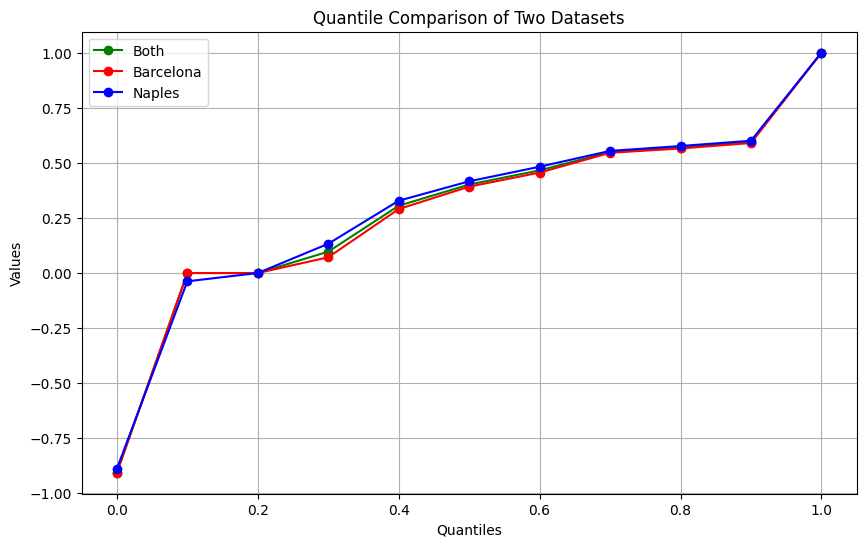

In [12]:
# Define the quantiles and their corresponding values for both datasets
quantiles_bins = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]

# Plot the quantiles for both datasets
plt.figure(figsize=(10, 6))
plt.plot(quantiles_bins, quantiles, marker='o', linestyle='-', color='g', label='Both')
plt.plot(quantiles_bins, quantiles_BCN, marker='o', linestyle='-', color='r', label='Barcelona')
plt.plot(quantiles_bins, quantiles_NAP, marker='o', linestyle='-', color='b', label='Naples')

# Add titles and labels
plt.title('Quantile Comparison of Two Datasets')
plt.xlabel('Quantiles')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [13]:
def plot_data_histograms(array, title):
    print(title)

    # Flatten the array to shape (165 * 76 * 76, 3)
    flattened_array = array.reshape(-1, 3)

    # Extract the FA, GM, RS channels
    fa_channel = flattened_array[:, 0]
    gm_channel = flattened_array[:, 1]
    rs_channel = flattened_array[:, 2]

    # Plot histograms for each channel
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 3, 1)
    plt.hist(fa_channel, bins=256, color='red', alpha=0.6)
    plt.title('FA Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(gm_channel, bins=256, color='green', alpha=0.6)
    plt.title('GM Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(rs_channel, bins=256, color='blue', alpha=0.6)
    plt.title('RS Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

Histograms for the data of Barcelona


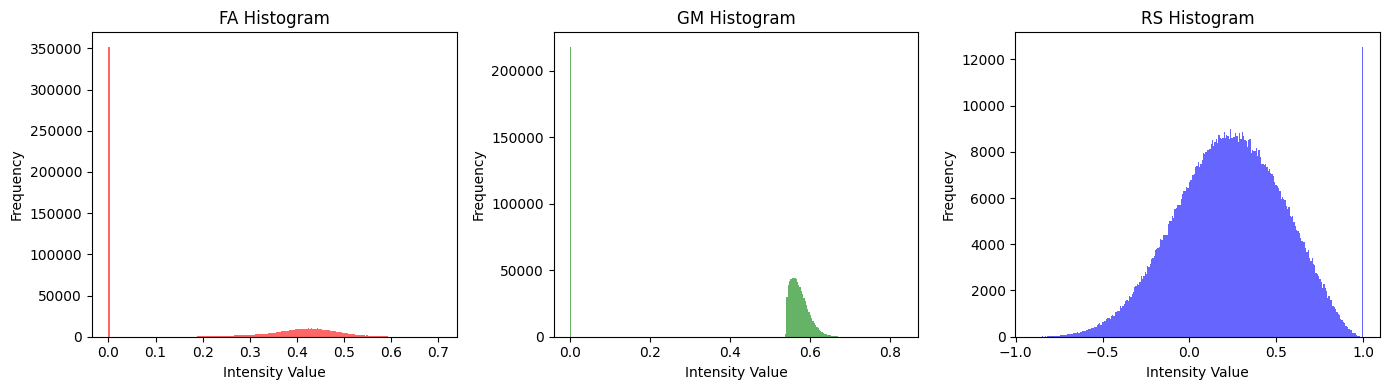

In [14]:
plot_data_histograms(data_BCN, "Histograms for the data of Barcelona")

Histograms for the data of Naples


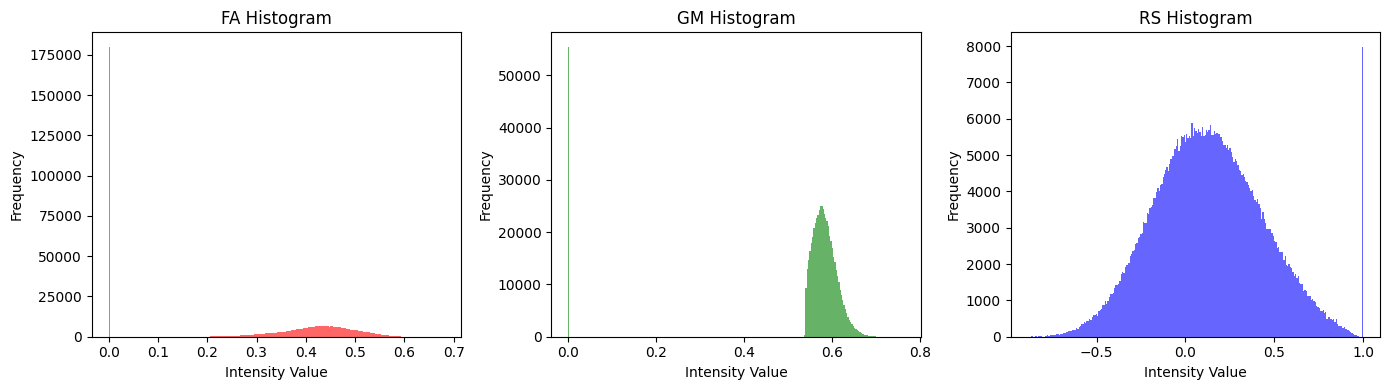

In [15]:
plot_data_histograms(data_NAP, "Histograms for the data of Naples")

Histograms for the data of both


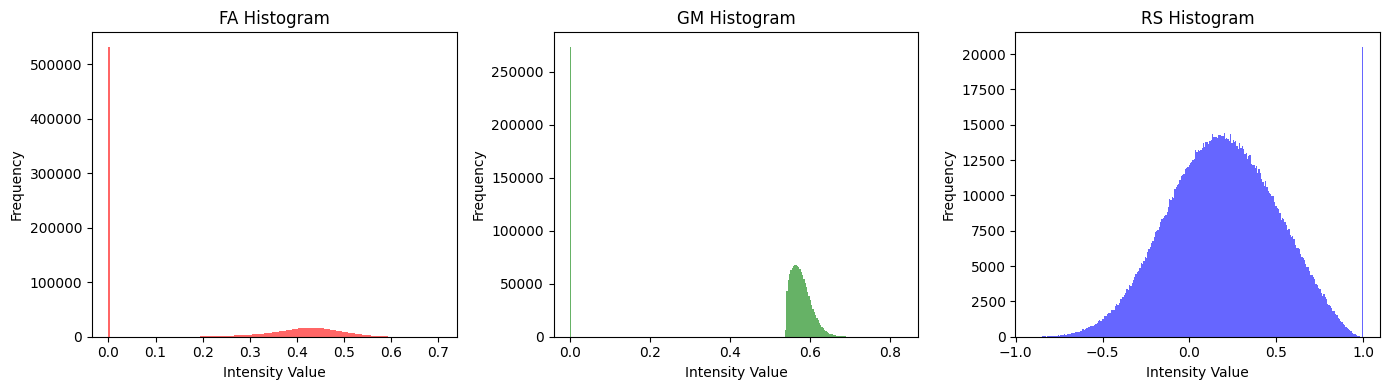

In [16]:
plot_data_histograms(data, "Histograms for the data of both")

In [17]:
def plot_data_histograms_nonzero(array, title):
    print(title)

    # Flatten the array to shape (165 * 76 * 76, 3)
    flattened_array = array.reshape(-1, 3)

    # Extract the FA, GM, RS channels
    fa_channel_wzero = flattened_array[:, 0]
    fa_channel = fa_channel_wzero[fa_channel_wzero != 0]
    gm_channel_wzero = flattened_array[:, 1]
    gm_channel = gm_channel_wzero[gm_channel_wzero != 0]
    rs_channel_wzero = flattened_array[:, 2]
    rs_channel = rs_channel_wzero[rs_channel_wzero != 0]

    # Plot histograms for each channel
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 3, 1)
    plt.hist(fa_channel, bins=256, color='red', alpha=0.6)
    plt.title('FA Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(gm_channel, bins=256, color='green', alpha=0.6)
    plt.title('GM Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(rs_channel, bins=256, color='blue', alpha=0.6)
    plt.title('RS Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

Histograms for the nonzero data of Barcelona


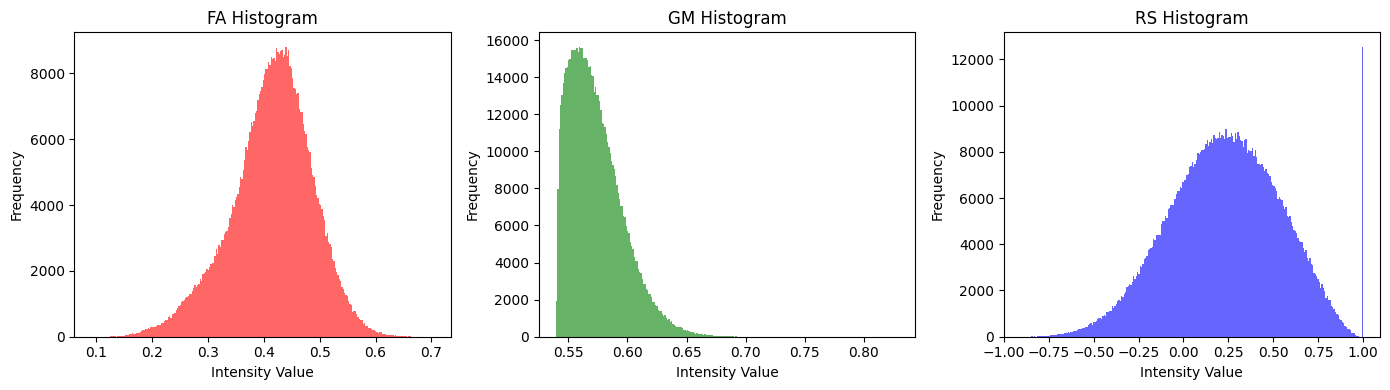

Histograms for the nonzero data of Naples


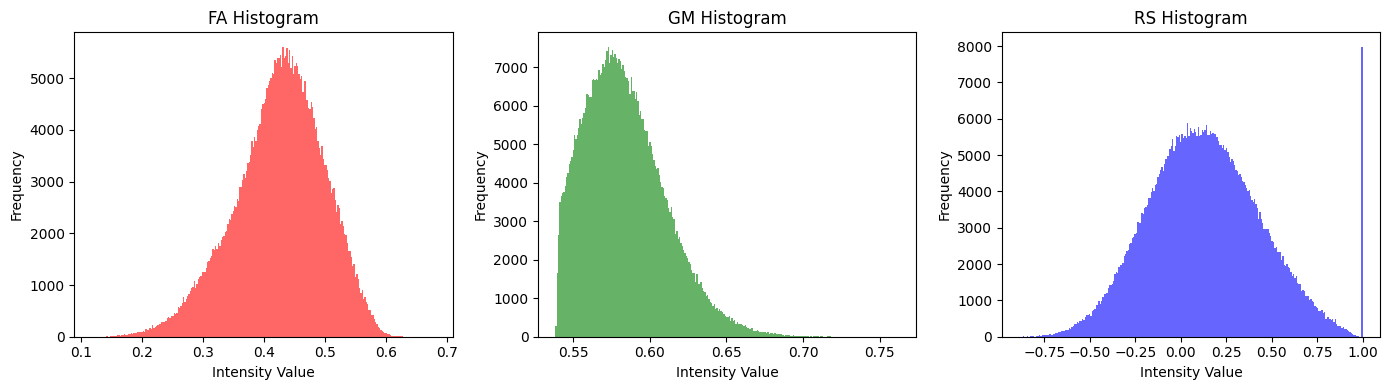

Histograms for the nonzero data of both


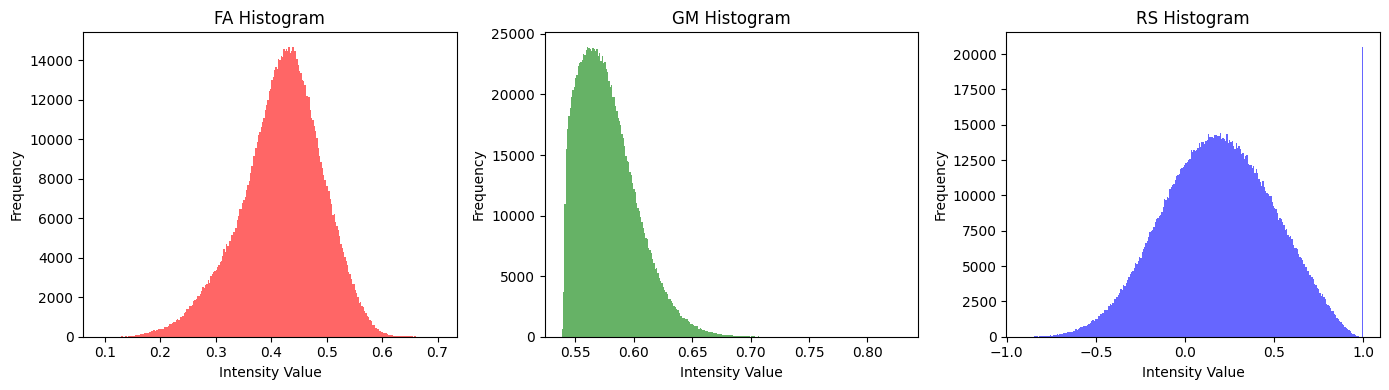

In [18]:
plot_data_histograms_nonzero(data_BCN, "Histograms for the nonzero data of Barcelona")
plot_data_histograms_nonzero(data_NAP, "Histograms for the nonzero data of Naples")
plot_data_histograms_nonzero(data, "Histograms for the nonzero data of both")

% of people with MS

In [19]:
prop = np.where(target == 1)[0].shape[0] / target.shape[0]
print("% of pwMS: {:.4f}".format(prop))

% of pwMS: 0.7370


- 0.8909 Bcn
- 0.5 Naples

Visually, quantiles are almost the same and histogram distributions are very alike. Let's perform a $\chi^2$ test to proof that the two data sources have the same distributions:
- H0: they come from different sources (different distributions)
- H1: same source

In [20]:
data1_flat = data_BCN.flatten()
data2_flat = data_NAP.flatten()

# Compute histograms (50 bins in this case)
hist1, bins1 = np.histogram(data1_flat, bins=50)
hist2, bins2 = np.histogram(data2_flat, bins=50)

# Normalize the histograms so they sum to 1
hist1_normalized = hist1 / np.sum(hist1)
hist2_normalized = hist2 / np.sum(hist2)

# Perform chi-square test
chi2_stat, p_value = chisquare(hist1_normalized, hist2_normalized)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("H0 is true. The distributions are likely different.")
else:
    print("Cannot discard H0. The distributions are likely similar.")


Chi-Square Statistic: 0.07238329630230646
P-value: 1.0
Cannot discard H0. The distributions are likely similar.
